# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



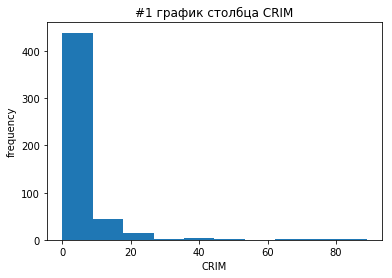

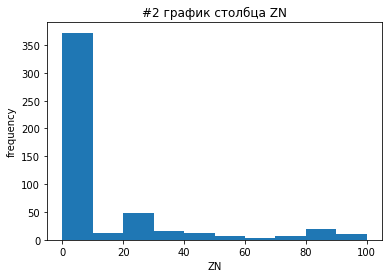

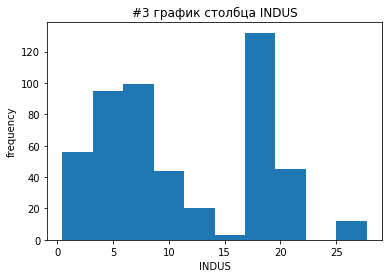

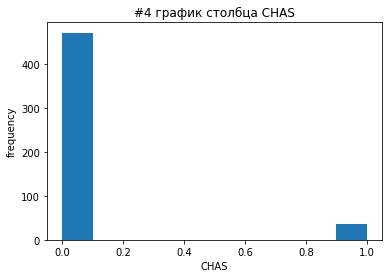

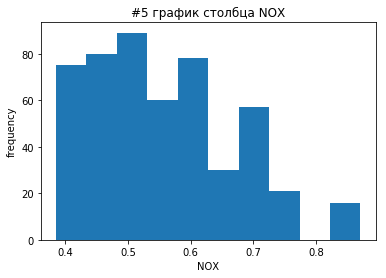

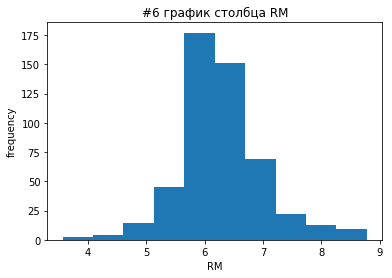

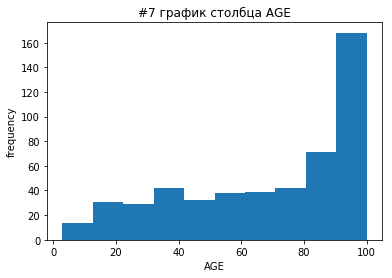

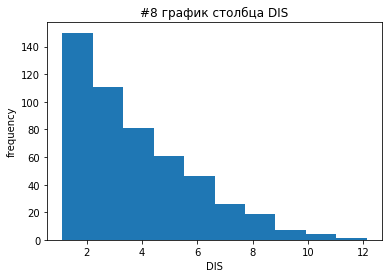

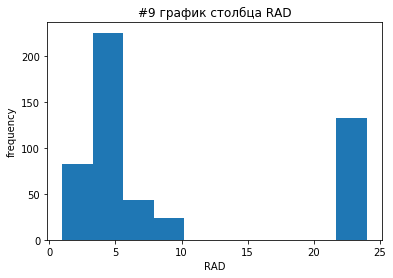

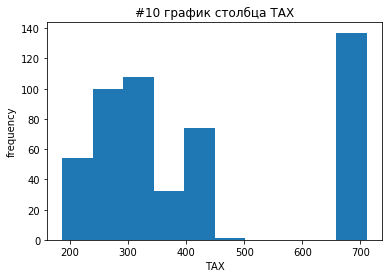

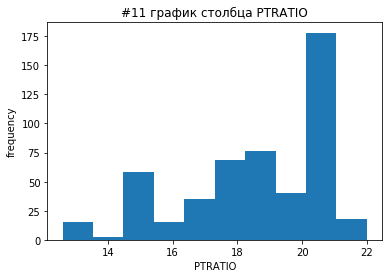

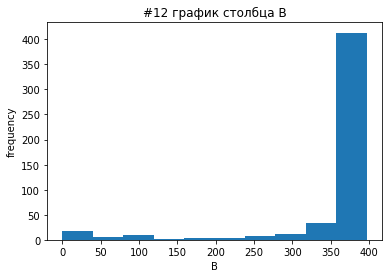

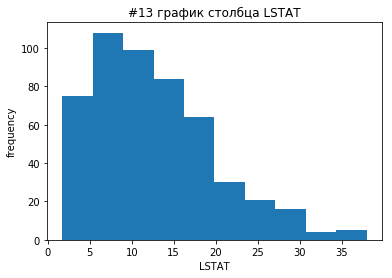

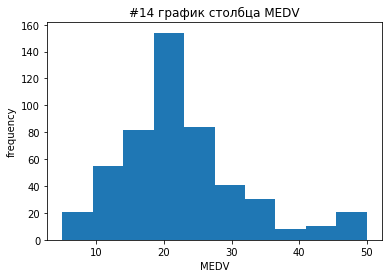

In [3]:
for idx, column in enumerate(df.columns):
    plt.hist(df[column])
    
    plt.title(f'#{idx + 1} график столбца {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
    
    plt.show()

1 - геометрическое распределение 

2 - геометрическое распределение

3 - похож на биноминальное распределение с выбросом

4 - распределение Бернулли

5 - негативное биноминальное распределение

6 - распределение Стьюдента

7 - геометрическое распределение

8 - геометрическое распределение

9 - гипергеометрическое распределение с выбросом

10 - странный график, похож на распределение Райса с выбросом

11 - какое-то не стандартное распределение, затрудняюсь дать классификацию

12 - логнормальное распределение

13 - отрицательное биноминальное распределение

14 - биноминальное распределение

In [4]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

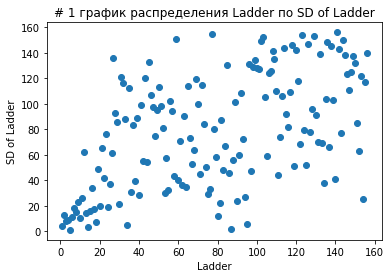

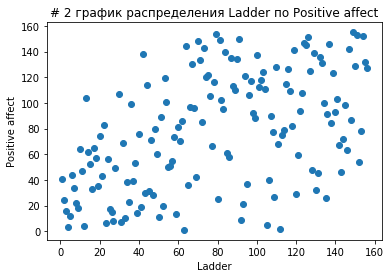

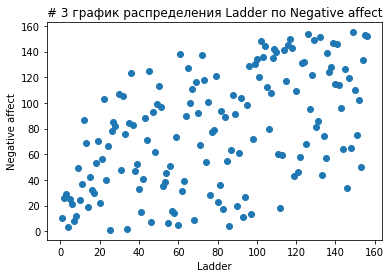

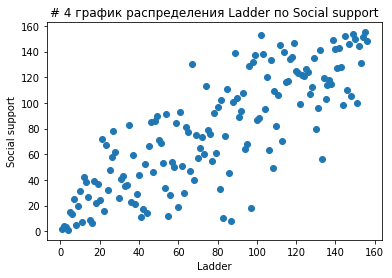

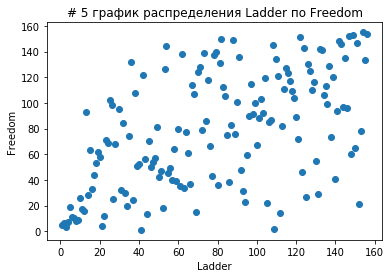

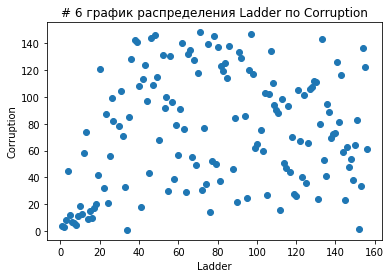

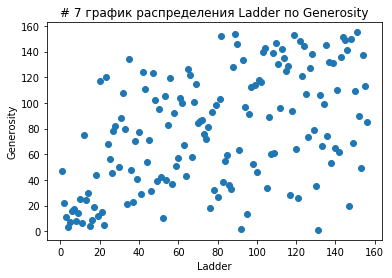

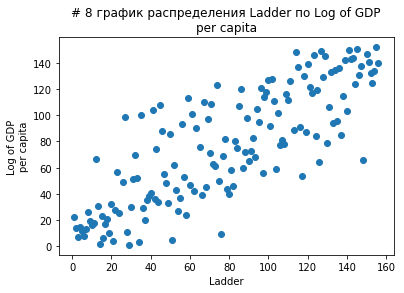

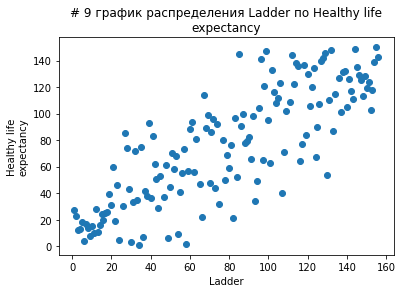

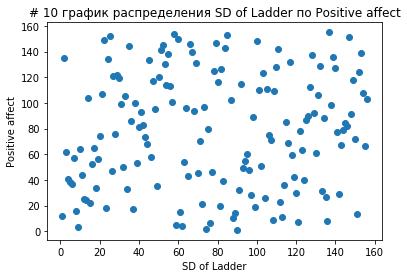

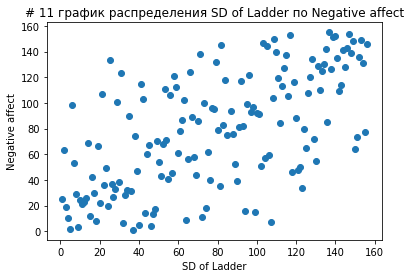

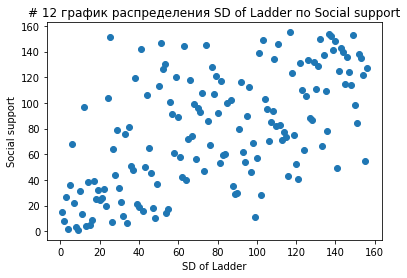

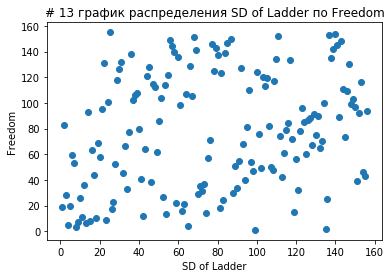

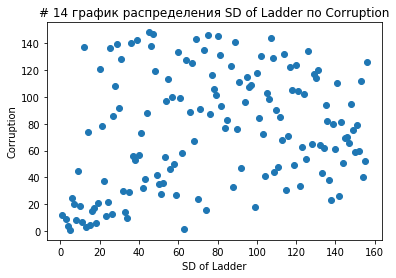

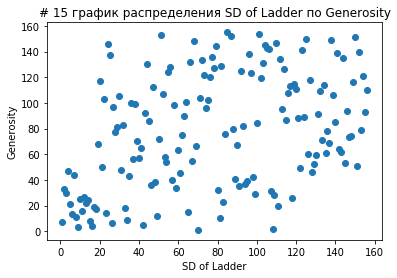

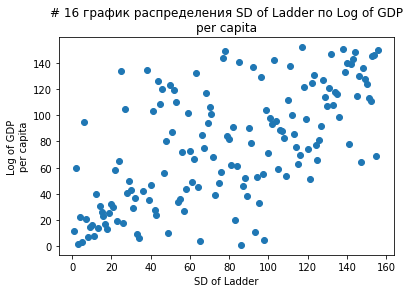

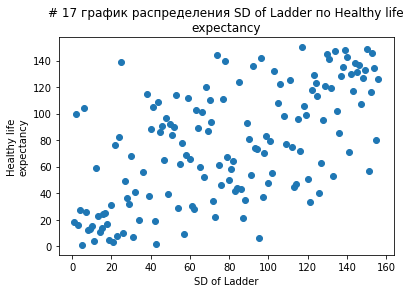

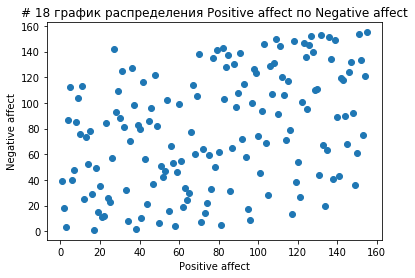

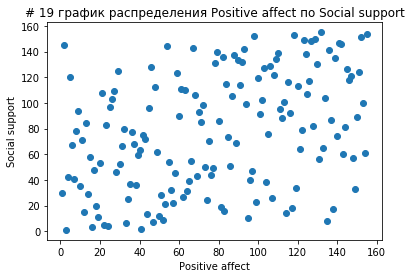

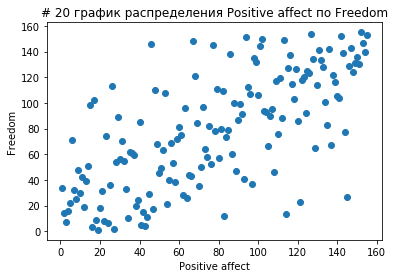

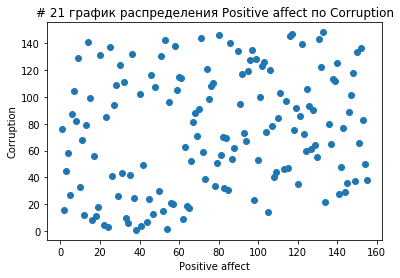

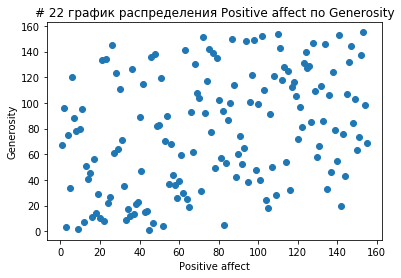

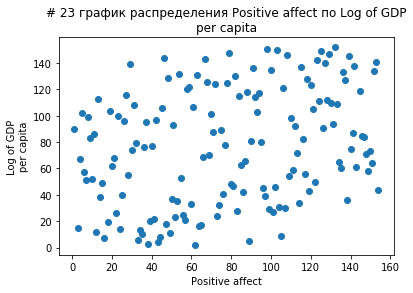

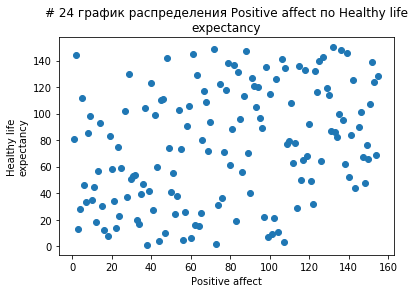

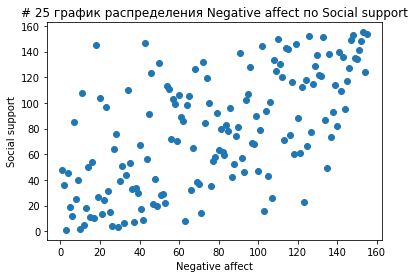

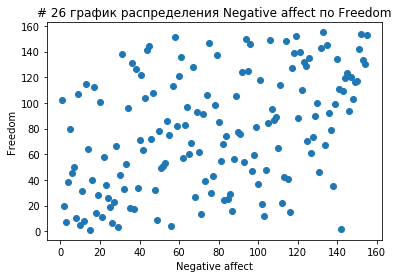

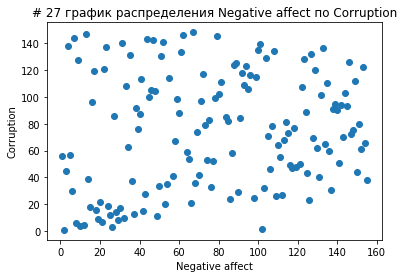

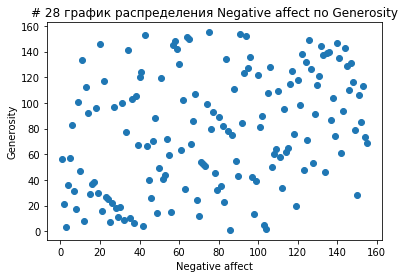

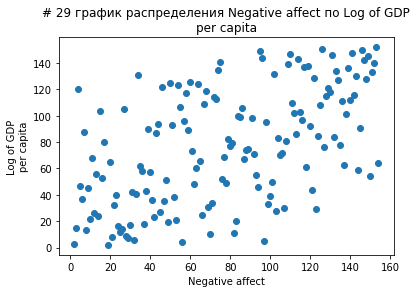

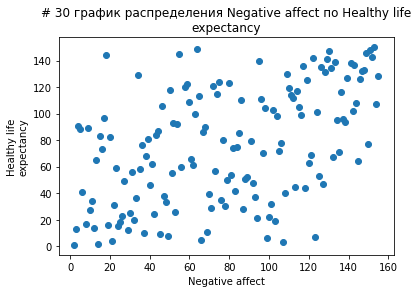

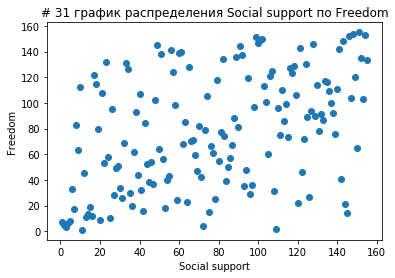

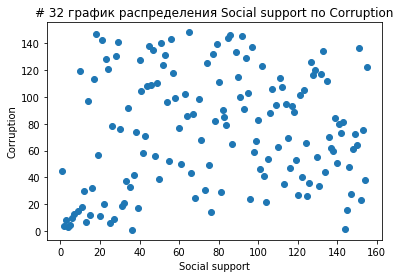

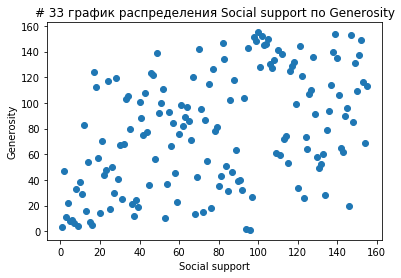

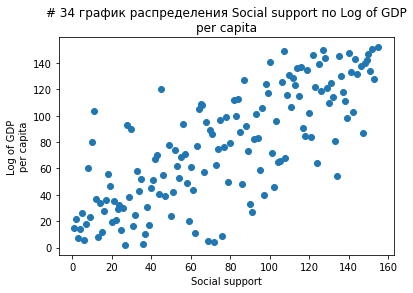

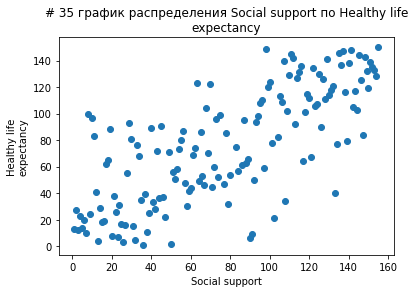

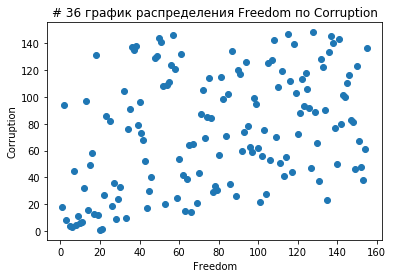

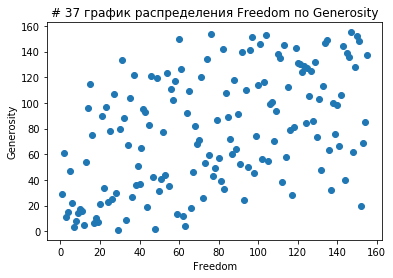

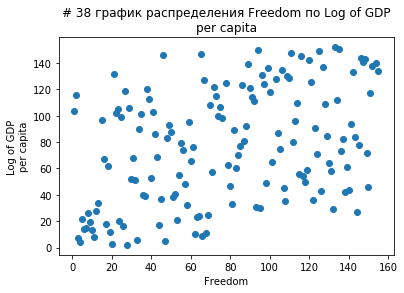

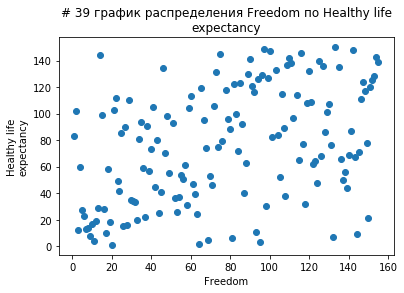

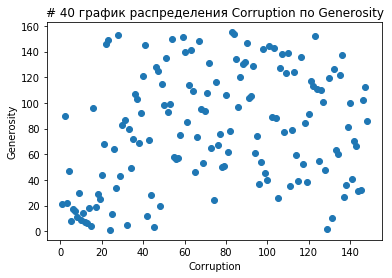

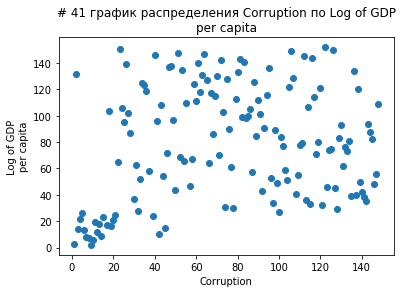

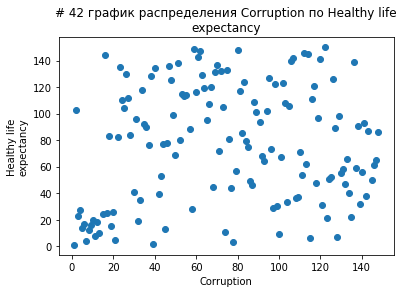

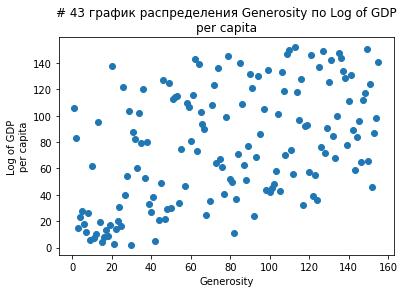

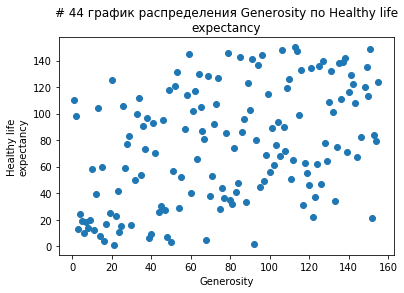

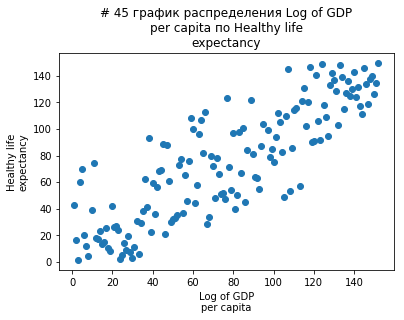

In [5]:
df_column_count = len(df.columns)
plots_counter = 0

# skip country column with range from 1
for i_out in range(1, df_column_count):
    # i_out + 1 - skipping self correlation
    for i_in in range(i_out + 1, df_column_count):
        x_label = df.columns[i_out]
        y_label = df.columns[i_in]
        plt.scatter(df[x_label], df[y_label])
        plots_counter += 1

        plt.title(f'# {plots_counter} график распределения {x_label} по {y_label}')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        plt.show()

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
# Если честно, я не понял, в чём сложность задачи
# Мы можем применить np.cov() к матрице, где каждый ряд - вектор,
# тогда матрица ковариаций будет попарная "из коробки"
cov_matrix = np.cov(data.drop(columns='Country (region)'))
cov_df = pd.DataFrame(cov_matrix)
print(cov_df.info())
cov_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Columns: 156 entries, 0 to 155
dtypes: float64(156)
memory usage: 190.2 KB
None


,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,289.788889,119.766667,44.333333,-49.655556,-5.644444,101.188889,77.166667,53.455556,-20.444444,133.555556,...,-279.377778,142.677778,NaN,40.611111,303.088889,-12.544444,-213.711111,125.133333,-88.177778,-177.644444
1,119.766667,90.900000,60.888889,-42.233333,20.088889,57.811111,30.388889,34.544444,53.555556,53.111111,...,-66.844444,14.877778,NaN,27.722222,18.244444,16.988889,-127.844444,-29.022222,-12.044444,6.422222
2,44.333333,60.888889,62.888889,-14.777778,28.333333,46.333333,2.888889,14.555556,75.333333,35.555556,...,-51.555556,-68.222222,NaN,-19.666667,-88.777778,-20.777778,-168.666667,-10.000000,8.555556,-0.777778
3,-49.655556,-42.233333,-14.777778,170.233333,-3.866667,-56.588889,-49.833333,-12.877778,-44.555556,-55.555556,...,-258.822222,-220.544444,NaN,-225.944444,-155.022222,-363.988889,-200.488889,-30.533333,-62.400000,-282.866667
4,-5.644444,20.088889,28.333333,-3.866667,50.488889,9.488889,-8.222222,-2.644444,34.888889,25.333333,...,84.466667,-165.200000,NaN,-78.111111,-49.711111,-22.422222,-102.644444,141.488889,57.644444,57.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-12.544444,16.988889,-20.777778,-363.988889,-22.422222,-113.366667,32.500000,50.011111,104.000000,-189.222222,...,808.177778,896.455556,NaN,1384.833333,270.866667,2581.122222,1437.622222,310.244444,604.377778,857.022222
152,-213.711111,-127.844444,-168.666667,-200.488889,-102.644444,-158.755556,55.888889,63.955556,-127.333333,-204.444444,...,1218.955556,651.955556,NaN,1006.111111,280.422222,1437.622222,1693.733333,-218.088889,374.155556,884.911111
153,125.133333,-29.022222,-10.000000,-30.533333,141.488889,62.711111,-7.000000,-48.755556,-109.666667,230.555556,...,276.466667,-295.644444,NaN,-154.555556,598.400000,310.244444,-218.088889,1479.600000,294.200000,-3.288889
154,-88.177778,-12.044444,8.555556,-62.400000,57.644444,-32.466667,-14.888889,15.711111,43.555556,-26.666667,...,528.600000,-77.733333,NaN,264.555556,-3.311111,604.377778,374.155556,294.200000,280.622222,365.533333


In [8]:
cov_df.dropna(how='all').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Columns: 156 entries, 0 to 155
dtypes: float64(156)
memory usage: 171.7 KB


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

- Как показала практика, в таблице были отсутствующие значения. Колонку 'country' убрал изначально, т.к. по строковым значениям не возможно посчитать ковариацию

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [9]:
len(data['Country (region)'].unique())

156

- Уникальных стран в выборке столько же, сколько и рядов - 156

- Странно, но я только на этом этапе понял, что требовалось перевести страны в индексы и проводить вычисления опираясь на них. Это вряд ли изменит полученные вычисления, но такой способ тоже был бы валидным.

- То что каждая страна представленна лишь в 1 ряду не является для нас проблемой классификации, т.к. мы расчитывали значения попарно для каждого из столбцов.

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

D:\Soft\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Soft\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


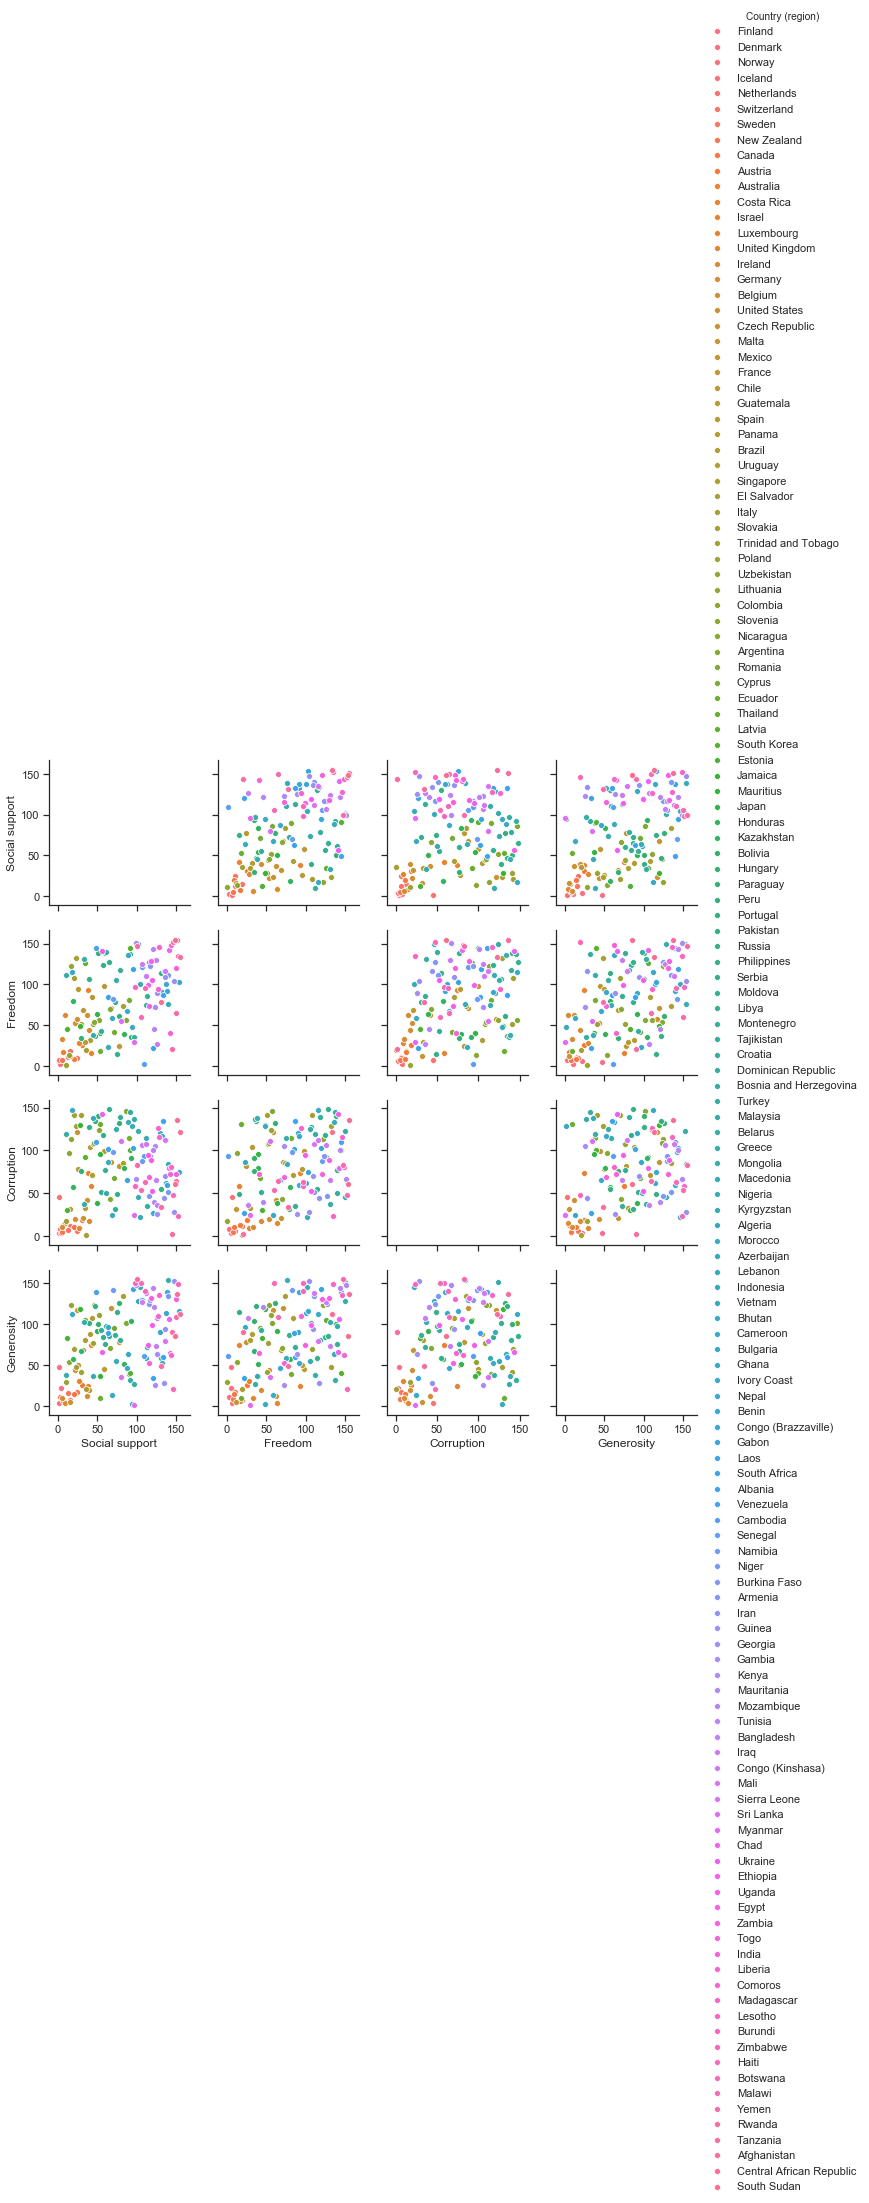

In [10]:
data.dropna(inplace=True)
pairplots_hue = 'Country (region)'
pairplots_columns = [pairplots_hue, 'Social support', 'Freedom', 'Corruption', 'Generosity']

sns.set(style='ticks', color_codes=True)
fig = sns.pairplot(
    data=data[pairplots_columns],
    hue=pairplots_hue
)
plt.show()

- Сделать выводы о том, какие страны похожи - крайне сложно, т.к. эти страны вряд ли получится сегментировать хотя бы по континентам. Я могу сделать один вывод, что в квадрате 25x25 находится значимый сгусток стран, схожих по цвету - оранжевый и красный (страны европы).

- Для анализа я взял социально-значимые показатели, такие как уровень свободы, социальную поддержку, уровень коррупции, уровень великодушия. Почти во всех графиках в указаном квадрате сосредоточены именно страны центральной европы.

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

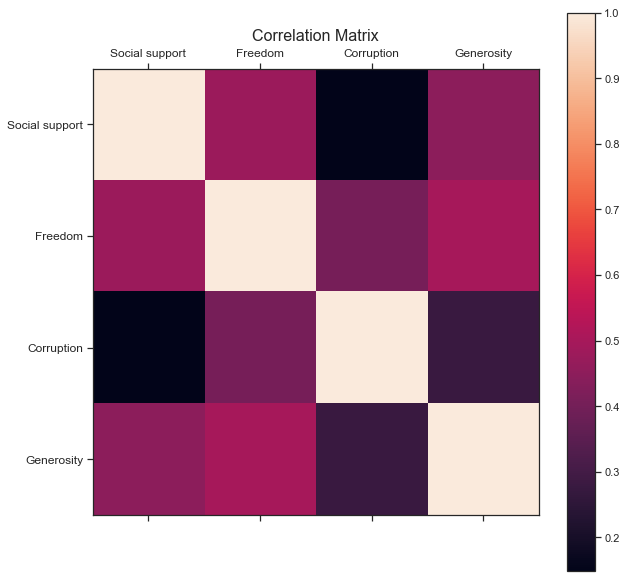

In [45]:
corrcoef_columns = pairplots_columns[1:]
corr_df = data[corrcoef_columns]

fig = plt.figure(figsize=(10, 10))

plt.matshow(corr_df.corr(), fignum=fig.number)
plt.title('Correlation Matrix', fontsize=16);
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=12)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=12)
plt.colorbar()
plt.show()

- теперь же, у нас на руках интересная картина о зависимости значений друг от друга. Оказывается, уровень коррупции почти не коррелируется с социальной поддержкой. Так же, коррупция мало коррелируется с уровнем великодушия населения.

- в свою очередь, уровень великодушия хорошо коррелируется с уровнем свободы, а уровень свободы с уровенем социальной поддержки

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

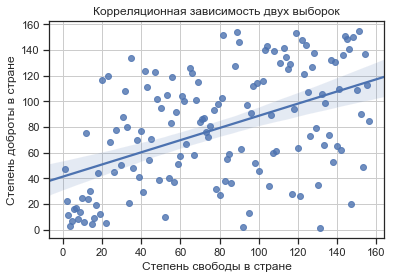

In [47]:
data.dropna(how='all', inplace=True)
ladder = data['Ladder']
generosity = data['Generosity']

sns.regplot(x=ladder, y=generosity, data=data, fit_reg=True)
plt.grid(True)

plt.xlabel('Степень свободы в стране')
plt.ylabel('Степень доброты в стране')
plt.title('Корреляционная зависимость двух выборок')

plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD532EC448>]],
      dtype=object)

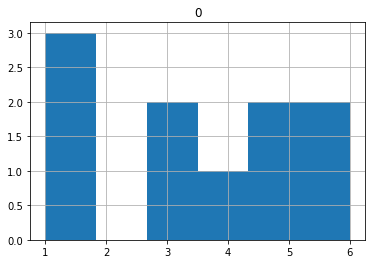

In [145]:
def throw_dice(count, faces=6):
    return [np.random.randint(1, faces + 1) for _ in range(count)]

pd.DataFrame(throw_dice(10)).hist(bins=6)

- При малых количествах подбрасываний, распределение не стабильное

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0414D108>]],
      dtype=object)

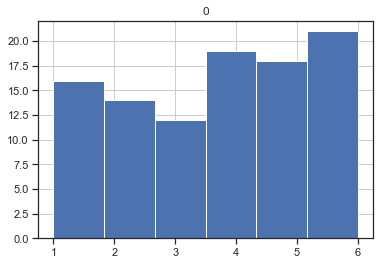

In [49]:
pd.DataFrame(throw_dice(100)).hist(bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E05629988>]],
      dtype=object)

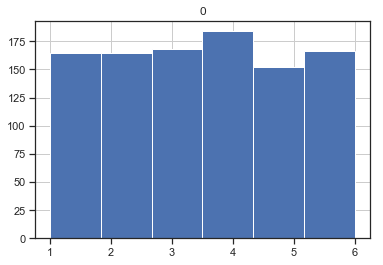

In [50]:
pd.DataFrame(throw_dice(1000)).hist(bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E03B3D688>]],
      dtype=object)

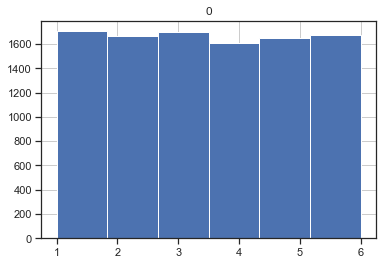

In [51]:
pd.DataFrame(throw_dice(10000)).hist(bins=6)

- При увеличении количества подбрасываний, распределение становится равномерным

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

- Предыдущий эксперемент я провёл ещё ДО прочтения последнего задания. Я уже отметил, что при увеличении числа подбрасываний график стремится к равномерному распределению.

- Как применить ЦПТ? очень просто! Все эти случайные величины никак не зависят друг от друга. Следствием этому и является то, что ни одна из величин никак не доминирует над другими. Следовательно, это и есть проявление ЦПТ на живом примере

## 1 цикл доработок:

In [78]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


> у тебя матрица ковариаций получилась 156x156, а должна быть 10 на 10, то есть нужно сделать транспонирование матрицы перед вычислением матрицы ковариаций.

- Исправил, пришлось почистить данные и произвести транспонирование

In [79]:
cov_matrix = np.cov(data.drop(columns='Country (region)').dropna().T)
cov_df = pd.DataFrame(cov_matrix)
print(cov_df.info())
cov_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
0    10 non-null float64
1    10 non-null float64
2    10 non-null float64
3    10 non-null float64
4    10 non-null float64
5    10 non-null float64
6    10 non-null float64
7    10 non-null float64
8    10 non-null float64
9    10 non-null float64
dtypes: float64(10)
memory usage: 928.0 bytes
None


,0,1,2,3,4,5,6,7,8,9
0,2088.550668,1171.892806,1037.040699,1097.680164,1745.007194,1126.437205,437.435971,992.822302,1625.961768,1661.550154
1,1171.892806,2127.170144,184.695683,1298.799281,1268.032374,520.631655,498.416547,796.974460,1327.720144,1293.221942
2,1037.040699,184.695683,1965.293114,694.321274,880.136691,1392.962795,427.188489,826.971942,597.456937,661.012436
3,1097.680164,1298.799281,694.321274,1980.795272,1369.014388,835.041521,316.040288,697.807914,1091.695581,992.679651
4,1745.007194,1268.032374,880.136691,1369.014388,2099.086331,989.151079,290.978417,918.334532,1592.892086,1521.895683
5,1126.437205,520.631655,1392.962795,835.041521,989.151079,2034.819322,784.235971,1005.233094,754.765057,841.068243
6,437.435971,498.416547,427.188489,316.040288,290.978417,784.235971,1819.535252,536.400719,344.248921,279.475540
7,992.822302,796.974460,826.971942,697.807914,918.334532,1005.233094,536.400719,2000.574460,891.584892,891.374460
8,1625.961768,1327.720144,597.456937,1091.695581,1592.892086,754.765057,344.248921,891.584892,1879.769579,1665.842035
9,1661.550154,1293.221942,661.012436,992.679651,1521.895683,841.068243,279.475540,891.374460,1665.842035,1934.236948


> можно сказать, что это проблема классификации, если мы, например, предсказываем страну, к которой относится тот или иной элемент по другим атрибутам.

Мне до сих пор не поддаются все мат стат термины, поэтому я и не предвидел ситуацию, что мы не сможем определить какую-то страну по произвольным аттрибутам... Хорошее задание и отличный вопрос - позволяет осознать термин!

> не сделано сравнение регрессионной прямой и собственного вектора

Ниже следует реализация собственного вектора и регрессионной прямой

In [136]:
data.dropna(inplace=True)
ladder = data['Ladder']
ladder_mean = ladder.mean()

generosity = data['Generosity']
generosity_mean = generosity.mean()

In [137]:
ladder = ladder - ladder_mean
generosity = generosity - generosity_mean

In [138]:
y = np.array((ladder, generosity))

eig_val, eig_vec = np.linalg.eig(np.cov(y))
print('eigenvectors:')
print(eig_vec)

eigenvectors:
[[ 0.72258657 -0.69128044]
 [ 0.69128044  0.72258657]]


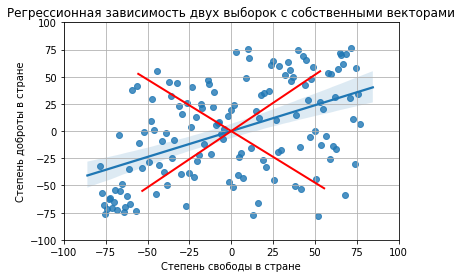

In [141]:
sns.regplot(x=ladder, y=generosity, data=data, fit_reg=True)
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.grid(True)

for i in range(len(eig_val)):    
    plt.plot(
        np.array([-eig_vec[i][0], eig_vec[i][0]]) * ladder.max(),
        np.array([-eig_vec[i][1], eig_vec[i][1]]) * generosity.max(),
        color='red',
        linewidth=2
    )

plt.title('Регрессионная зависимость двух выборок с собственными векторами')
plt.xlabel('Степень свободы в стране')
plt.ylabel('Степень доброты в стране')
plt.show()

Смотря на регрессионный график с наложенными поверх собственными векторами, можно сделать заключение, что собственные векторы никак не похожи на линию регрессии.

> ЦПТ гласит, что если мы берем сумму независимых экспериментов как новое распределение, то это распределение стремится к нормальному.

На сколько я внимательно постарался отнестись ко всем подсказкам, я понял требуется брать не кол-во выпаданий того или иного значения, а сумму всех выпавших результатов при нескольких подб

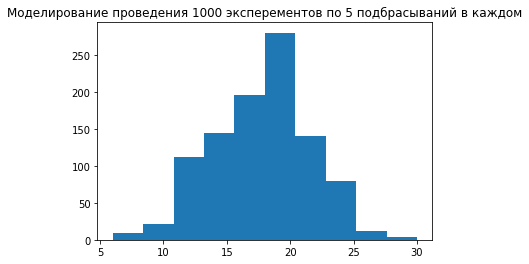

In [223]:
experiments_count = 1000
throw_dice_count = 5

aaa = np.zeros((experiments_count, 1))

for i in range(experiments_count):
    aaa[i, 0] = np.sum(throw_dice(throw_dice_count))
    
plt.title(f'Моделирование проведения {experiments_count} эксперементов по {throw_dice_count} подбрасываний в каждом')
plt.hist(aaa, 10)
plt.show()